In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [21]:
X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1,1)
y = np.array([150, 180, 200, 230, 250, 280])

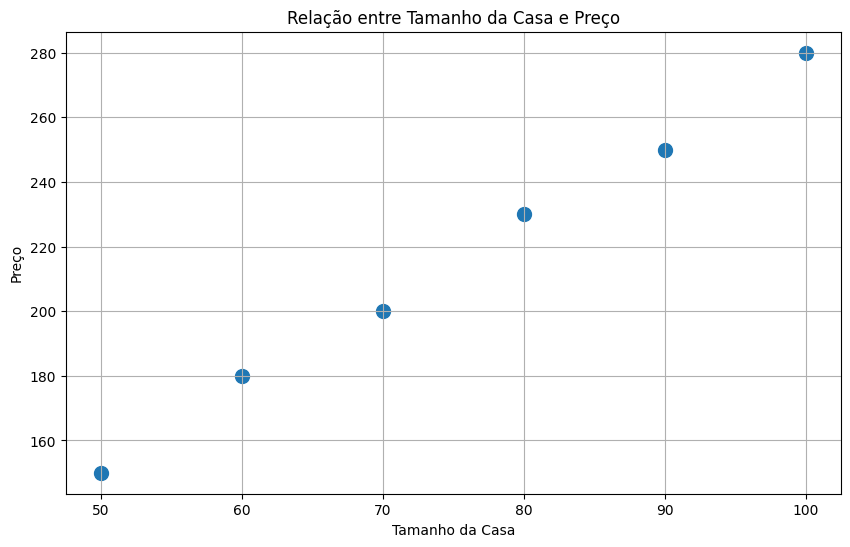

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, s=100)
plt.title("Relação entre Tamanho da Casa e Preço")
plt.xlabel("Tamanho da Casa")
plt.ylabel("Preço")
plt.grid(True)
plt.show()

In [23]:
modelo_simples = LinearRegression()
modelo_simples.fit(X,y)

LinearRegression()

In [24]:
print("Coeficiente angular (inclinação):", modelo_simples.coef_[0])
print("Coeficiente linear (intercepto):", modelo_simples.intercept_)

Coeficiente angular (inclinação): 2.542857142857143
Coeficiente linear (intercepto): 24.285714285714278


In [25]:
X_novo = np.array([[65], [75]])
y_pred = modelo_simples.predict(X_novo)

In [26]:
print(f"Previsão de preço para uma casa de 65m²: {y_pred[0]}")
print(f"Previsão de preço para uma casa de 75m²: {y_pred[1]}")

Previsão de preço para uma casa de 65m²: 189.57142857142858
Previsão de preço para uma casa de 75m²: 215.0


# **Dataset Preços de casas de Boston**

| Atributo       | Tipo          | Descrição                                                                 |
|----------------|---------------|--------------------------------------------------------------------------|
| **MedInc**     | `float`       | Renda média dos residentes (em dezenas de milhares de USD).              |
| **HouseAge**   | `float`       | Idade média das casas (em anos).                                         |
| **AveRooms**   | `float`       | Média de cômodos (quartos + outros) por residência.                      |
| **AveBedrms**  | `float`       | Média de quartos por residência.                                         |
| **Population** | `float`       | População total na área.                                                 |
| **AveOccup**   | `float`       | Média de ocupantes por residência.                                       |
| **Latitude**   | `float`       | Coordenada geográfica (latitude).                                        |
| **Longitude**  | `float`       | Coordenada geográfica (longitude).                                       |
| **MedHouseVal** (Target) | `float` | Valor mediano das casas (em centenas de milhares de USD). |

In [27]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


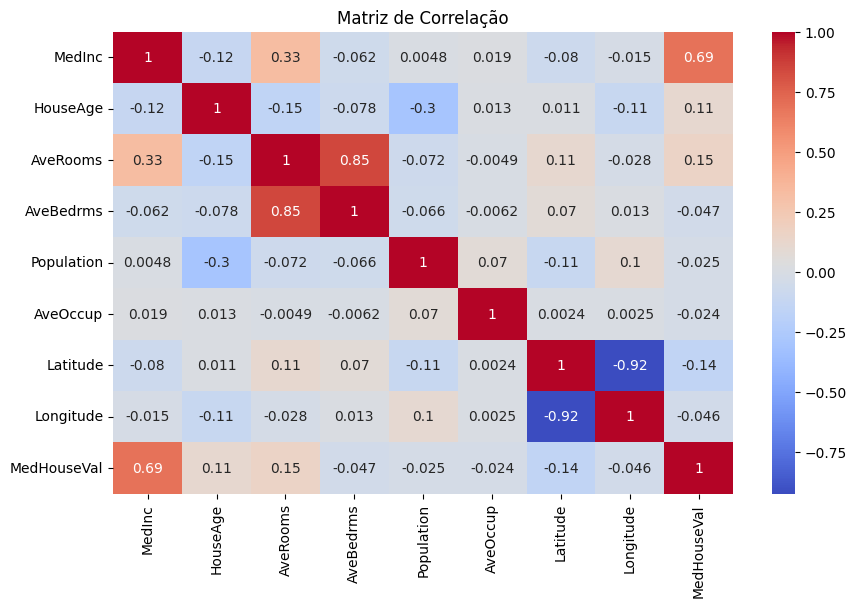

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [30]:
feature = ['MedInc', 'AveRooms', 'HouseAge']

x = df[feature]
y = df['MedHouseVal']


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x_scaled

array([[ 2.34476576,  0.62855945,  0.98214266],
       [ 2.33223796,  0.32704136, -0.60701891],
       [ 1.7826994 ,  1.15562047,  1.85618152],
       ...,
       [-1.14259331, -0.09031802, -0.92485123],
       [-1.05458292, -0.04021111, -0.84539315],
       [-0.78012947, -0.07044252, -1.00430931]], shape=(20640, 3))

In [33]:
modelo = LinearRegression()
modelo.fit(x_scaled, y)



LinearRegression()

In [34]:
print("Coeficientes do modelo de regressão linear:")
for feature, coef in zip(feature, modelo.coef_):
    print(f"{feature}: {coef}")

print(f"Intercepto do modelo: {modelo.intercept_}")

Coeficientes do modelo de regressão linear:
MedInc: 0.8411511433905893
AveRooms: -0.06718066561962285
HouseAge: 0.21171013214939266
Intercepto do modelo: 2.068558169089147


In [35]:
y_pred = modelo.predict(x_scaled)

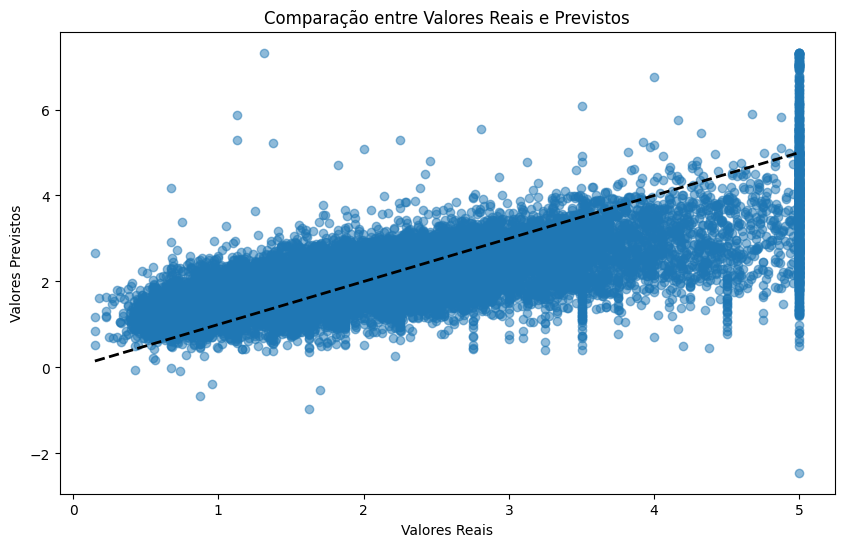

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Quadrático Médio (MSE): 0.6496608827746702
Coeficiente de Determinação (R²): 0.5121018839958533
